In [1]:
# IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# READING OUR DATA SET

data = pd.read_csv('Churn_Modelling.csv')

In [3]:
# CHECKING THE HEAD OF DATA

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# CHECKING THE INFO OF THE DATA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# CHECKING THE FEATURES OF DATA

data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# DROPPING THE RowNumber & CustomerId 

data = data.drop(['RowNumber', 'CustomerId'], axis = 1)

In [8]:
# AGAIN CHECKING THE DATA INFO

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


# EXPLORATORY DATA ANALYSIS

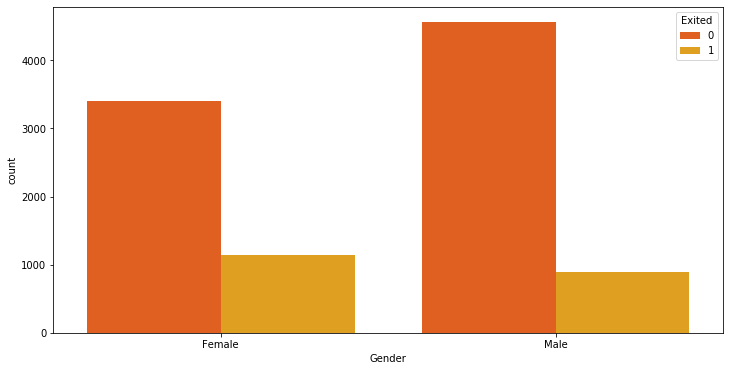

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender', data = data, hue = 'Exited', palette = 'autumn')

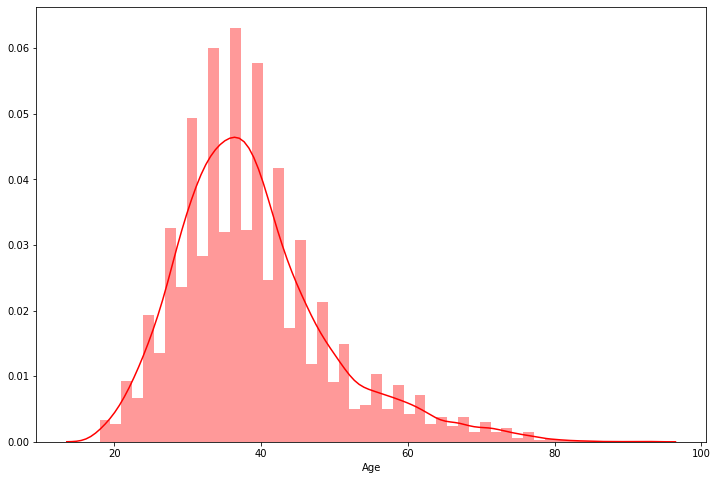

In [11]:
plt.figure(figsize = (12,8))
sns.distplot(data['Age'], color = 'red')

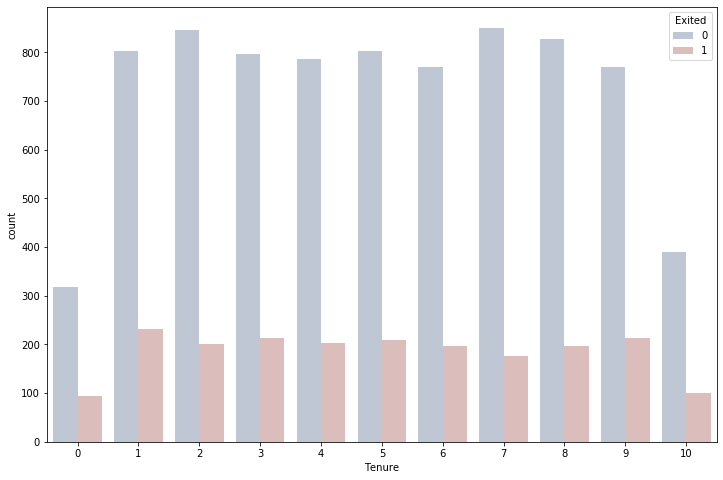

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Tenure', data = data, hue = 'Exited', palette = 'vlag')

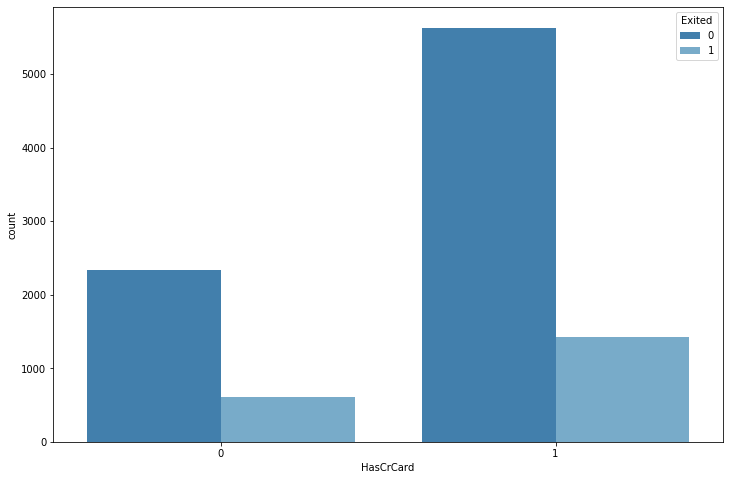

In [13]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'HasCrCard', data = data, hue = 'Exited', palette = 'tab20c')

In [14]:
data[(data['CreditScore']<=775) & (data['Exited'] == 1)] #1832
data[(data['CreditScore']<=775) & data['Exited'] == 0]    # 8168

data[(data['CreditScore']>=775) & data['Exited'] == 1]  #209
data[(data['CreditScore']>=775) & data['Exited'] == 0]  #9791


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


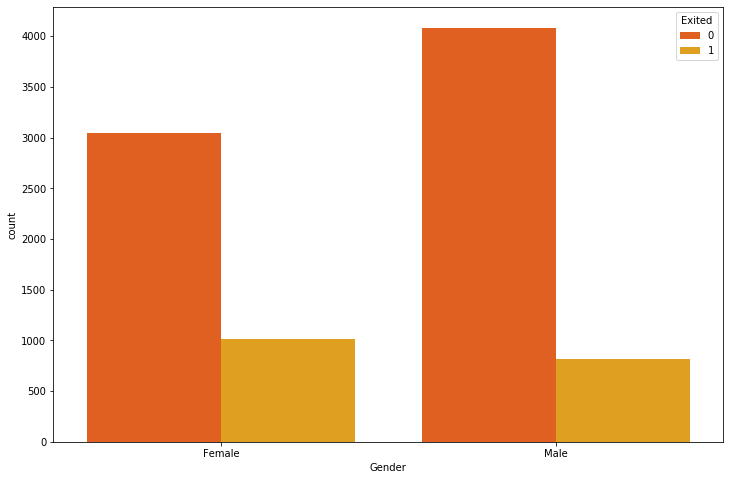

In [15]:
data[data['CreditScore']<=775]
plt.figure(figsize = (12,8))
sns.countplot(x = 'Gender', data = data[data['CreditScore']<=775], hue = 'Exited', palette = 'autumn')

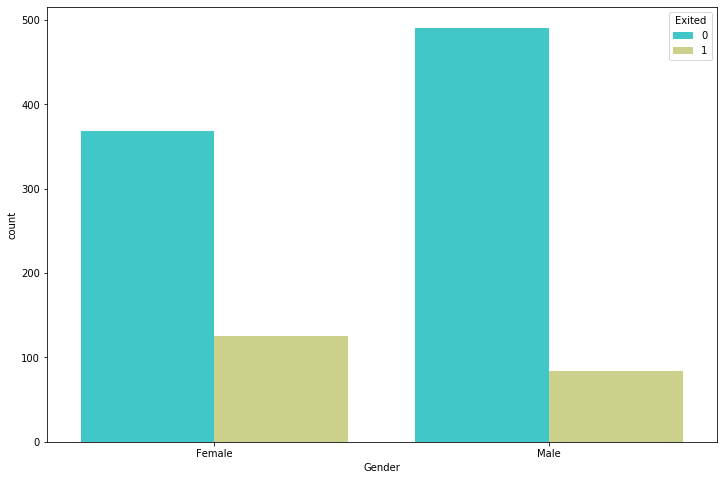

In [16]:
data[data['CreditScore']>=775]
plt.figure(figsize = (12,8))
sns.countplot(x = 'Gender', data = data[data['CreditScore']>=775], hue = 'Exited', palette = 'rainbow')

In [17]:
data.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [18]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [19]:
data[(data['Age'] == 37) & (data['Exited'] == 0)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
49,Buccho,776,Germany,Female,37,2,103769.22,2,1,0,194099.12,0
72,Palermo,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0
116,Welch,668,Germany,Female,37,6,167864.40,1,1,0,115638.29,0
147,Olisanugo,650,France,Male,37,5,106967.18,1,0,0,24495.03,0
153,Humphries,539,France,Male,37,2,127609.59,1,1,0,98646.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9854,Saad,681,Spain,Female,37,6,121231.39,1,1,1,146366.08,0
9872,Young,588,Spain,Male,37,2,0.00,2,0,1,187816.59,0
9890,Chidi,662,Spain,Male,37,4,155187.30,1,1,0,48930.80,0
9952,Cleveland,724,Germany,Male,37,6,125489.40,1,1,0,118570.53,0


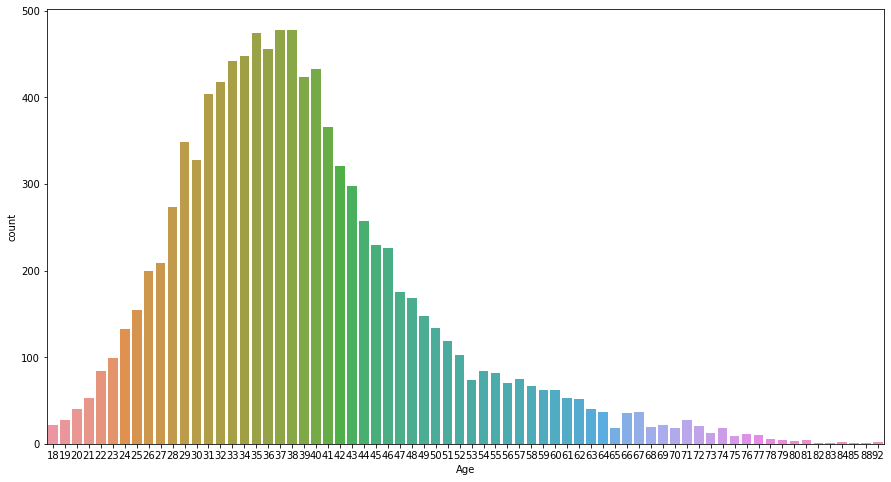

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Age', data = data)

In [21]:
# CHECKING THE HEAD OF DATASET AGAIN

data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# DROPPING THE Surname COLUMN

data = data.drop('Surname', axis = 1)

# DATA PREPROCESSING

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [27]:
data['Gender'] = le.fit_transform(data['Gender'].values.reshape(-1,1))

In [28]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
dummies = pd.get_dummies(data['Geography'])

In [30]:
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [33]:
data = pd.concat([data, dummies], axis = 1)

In [34]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [35]:
data = data.drop('Geography', axis = 1)

In [36]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
 12  Spain            10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(3)
memory usage: 771.6 KB


In [42]:
X = data.drop('Exited', axis = 1)

y = data['Exited']

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# MAKING THE NEURAL NETWORK 

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [169]:
model = Sequential()

model.add(Dense(units = 50, activation = 'relu', input_dim = 12))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = 12, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [170]:
model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2, verbose = 2)

Train on 5600 samples, validate on 1400 samples
Epoch 1/20
 - 0s - loss: 0.5996 - accuracy: 0.6905 - val_loss: 0.4993 - val_accuracy: 0.7964
Epoch 2/20
 - 0s - loss: 0.4682 - accuracy: 0.8000 - val_loss: 0.4407 - val_accuracy: 0.8093
Epoch 3/20
 - 0s - loss: 0.4293 - accuracy: 0.8125 - val_loss: 0.4079 - val_accuracy: 0.8293
Epoch 4/20
 - 0s - loss: 0.4060 - accuracy: 0.8271 - val_loss: 0.3840 - val_accuracy: 0.8407
Epoch 5/20
 - 0s - loss: 0.3875 - accuracy: 0.8336 - val_loss: 0.3668 - val_accuracy: 0.8557
Epoch 6/20
 - 0s - loss: 0.3714 - accuracy: 0.8450 - val_loss: 0.3528 - val_accuracy: 0.8636
Epoch 7/20
 - 0s - loss: 0.3591 - accuracy: 0.8512 - val_loss: 0.3435 - val_accuracy: 0.8707
Epoch 8/20
 - 0s - loss: 0.3511 - accuracy: 0.8548 - val_loss: 0.3403 - val_accuracy: 0.8679
Epoch 9/20
 - 0s - loss: 0.3464 - accuracy: 0.8555 - val_loss: 0.3330 - val_accuracy: 0.8707
Epoch 10/20
 - 0s - loss: 0.3429 - accuracy: 0.8579 - val_loss: 0.3330 - val_accuracy: 0.8743
Epoch 11/20
 - 0s - l

In [171]:
y_pred = model.predict(X_test)

In [172]:
y_pred

array([[0.7028339 ],
       [0.07817268],
       [0.24160175],
       ...,
       [0.03513419],
       [0.44892547],
       [0.15717773]], dtype=float32)

In [173]:
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

In [174]:
y_pred = np.array(y_pred)

In [175]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [176]:
print(confusion_matrix(y_test, y_pred))

[[2273  107]
 [ 313  307]]


In [177]:
print(accuracy_score(y_test, y_pred))

0.86


In [178]:
print(recall_score(y_test, y_pred))

0.49516129032258066


In [179]:
print(precision_score(y_test, y_pred))

0.7415458937198067


In [185]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

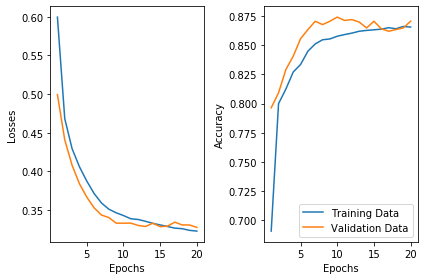

In [189]:
plt.subplot(1,2,1)
plt.plot(range(1,21), model.history.history['loss'], label = 'Training Data')
plt.plot(range(1,21), model.history.history['val_loss'], label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Losses')

plt.subplot(1,2,2)
plt.plot(range(1,21), model.history.history['accuracy'], label = 'Training Data')
plt.plot(range(1,21), model.history.history['val_accuracy'], label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.legend()